In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle

import librosa
import librosa.display
from IPython.display import Audio

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk("D:\DS\Song Emotion Recognition\Speech Recog\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        print('Dataset is Loaded')
        break

Dataset is Loaded


In [3]:
d = {'audio': paths, 'label': labels}
df = pd.DataFrame(data=d)
df.head()

,audio,label
0,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
1,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
2,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
3,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
4,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry


In [4]:
df = shuffle(df)
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,audio,label
0,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy
1,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
2,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
3,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
4,D:\DS\Song Emotion Recognition\Speech Recog\TE...,disgust


In [6]:
df['label'].value_counts()

happy      400
neutral    400
angry      400
disgust    400
ps         400
sad        400
fear       400
Name: label, dtype: int64

In [7]:
def extract_feat(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
x_ef = df['audio'].apply(lambda x: extract_feat(x))

In [8]:
type(x_ef)

pandas.core.series.Series

In [9]:
x_ef.shape

(2800,)

In [10]:
X = [x for x in x_ef]
X = np.array(X)
X.shape

(2800, 40)

In [11]:
type(X)

numpy.ndarray

In [14]:
#X = np.expand_dims(X,-1)
#X.shape

(2800, 40, 1)

In [12]:
X

array([[-307.82648  ,   28.52483  ,  -29.723549 , ...,   -1.8848119,
          -5.2645826,   -2.5169687],
       [-387.16562  ,  103.01318  ,  -13.825495 , ...,   27.681023 ,
           7.993047 ,   -3.2593598],
       [-539.151    ,  124.19071  ,   31.638233 , ...,   35.975502 ,
          16.460072 ,    1.4680022],
       ...,
       [-415.20203  ,  130.79768  ,   27.871264 , ...,   12.0982065,
          14.209072 ,   15.923146 ],
       [-525.6591   ,  109.39722  ,   19.225296 , ...,   39.64732  ,
          29.605762 ,   18.953228 ],
       [-297.05402  ,   25.756916 ,   13.8266   , ...,   -1.2488215,
          -1.764624 ,    3.691428 ]], dtype=float32)

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
type(y)

scipy.sparse._csr.csr_matrix

In [15]:
y.shape

(2800, 7)

In [16]:
y = y.toarray()
y.shape

(2800, 7)

In [17]:
type(y)

numpy.ndarray

In [18]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2800, 40) (2240, 40) (560, 40) (2240,) (560,)


In [19]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 4s 83ms/step - loss: 1.1917 - accuracy: 0.5344 - val_loss: 0.4964 - val_accuracy: 0.8429
Epoch 2/50
35/35 [==============================] - 3s 73ms/step - loss: 0.4091 - accuracy: 0.8589 - val_loss: 0.2085 - val_accuracy: 0.9232
Epoch 3/50
35/35 [==============================] - 2s 71ms/step - loss: 0.1966 - accuracy: 0.9379 - val_loss: 0.1739 - val_accuracy: 0.9393
Epoch 4/50
35/35 [==============================] - 3s 72ms/step - loss: 0.1569 - accuracy: 0.9504 - val_loss: 0.1844 - val_accuracy: 0.9518
Epoch 5/50
35/35 [==============================] - 3s 78ms/step - loss: 0.1816 - accuracy: 0.9429 - val_loss: 0.1783 - val_accuracy: 0.9518
Epoch 6/50
35/35 [==============================] - 3s 73ms/step - loss: 0.1083 - accuracy: 0.9670 - val_loss: 0.1908 - val_accuracy: 0.9375
Epoch 7/50
35/35 [==============================] - 2s 70ms/step - loss: 0.1194 - accuracy: 0.9670 - val_loss: 0.1571 - val_accuracy: 0.9536
Epoch 8/50
35

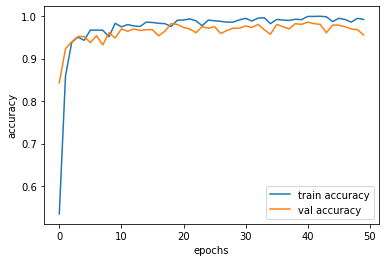

In [20]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [50]:
def to_format(filepath):
    pred_extraction = extract_feat(filepath)
    fomat = np.array(pred_extraction)
    fomat = fomat.reshape(-1,1)
    return fomat
#df['audio'][0]
#to_pred = to_format(df['audio'][0])
#type(to_pred)

In [144]:
to_pred = to_format(df['audio'][0])
to_pred

array([[              -307.826477],
       [                28.524830],
       [               -29.723549],
       [                33.847157],
       [               -22.056015],
       [                10.576652],
       [                -6.646882],
       [                -9.984513],
       [                 2.618359],
       [                -1.464032],
       [               -10.082344],
       [                12.475165],
       [                -9.398715],
       [                10.975546],
       [                -3.751351],
       [                -2.576631],
       [                -3.866509],
       [                -1.950035],
       [               -10.655766],
       [                -1.331545],
       [                -8.847979],
       [                -5.099771],
       [                -3.584106],
       [                 7.097256],
       [                10.801182],
       [                18.593822],
       [                12.310085],
       [                13.5

In [145]:
to_pred.shape

(40, 1)

In [146]:
to_pred_transpose = to_pred.T
to_pred_transpose.shape

(1, 40)

In [147]:
y_pred = model.predict(to_pred_transpose)
print(np.argmax(y_pred,axis= 1))

1/1 [==============================] - 0s 18ms/step
[0]


In [148]:
np.set_printoptions(formatter={'float_kind':'{:25f}'.format})
y_pred

array([[                 0.979089,                  0.000084,
                         0.003339,                  0.016881,
                         0.000005,                  0.000554,
                         0.000047]], dtype=float32)

In [122]:
df.tail(20)

,audio,label
2780,D:\DS\Song Emotion Recognition\Speech Recog\TE...,disgust
2781,D:\DS\Song Emotion Recognition\Speech Recog\TE...,ps
2782,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
2783,D:\DS\Song Emotion Recognition\Speech Recog\TE...,fear
2784,D:\DS\Song Emotion Recognition\Speech Recog\TE...,ps
2785,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy
2786,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy
2787,D:\DS\Song Emotion Recognition\Speech Recog\TE...,fear
2788,D:\DS\Song Emotion Recognition\Speech Recog\TE...,ps
2789,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy


In [117]:
df.head(20)

,audio,label
0,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy
1,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
2,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
3,D:\DS\Song Emotion Recognition\Speech Recog\TE...,angry
4,D:\DS\Song Emotion Recognition\Speech Recog\TE...,disgust
5,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
6,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
7,D:\DS\Song Emotion Recognition\Speech Recog\TE...,neutral
8,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy
9,D:\DS\Song Emotion Recognition\Speech Recog\TE...,happy


### 0 - Happy/Energetic/Angry, 1 - Disgust, 2 - Fear, 3 - Angry, 4 - Neutral, 5 - Pleasant Surprise, 6 - Sad

In [150]:
#Final Function

#Returns numerical features 
def feature_extraction(filepath):
    y, sr = librosa.load(filepath, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

#Returns converted format of the .wav file which can be used for prediction
def format_converter(filepath):
    pred_extraction = extract_feat(filepath)
    fomat = np.array(pred_extraction)
    fomat = fomat.reshape(-1,1)
    return fomat

#Predicts the emotion and returns integer corresponding to it
#All compiled. Final function to be used
#Can be modified to take model as an argument too. Using Globally declared model for testing
def predict_emotion(filepath):
    to_pred = format_converter(filepath)
    to_pred = to_pred.T
    y_pred = model.predict(to_pred)
    emotion = np.argmax(y_pred,axis = 1)
    return emotion, y_pred[emotion]

In [138]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://3993a482-46ca-4116-922c-91eefa36eb8f/assets


INFO:tensorflow:Assets written to: ram://3993a482-46ca-4116-922c-91eefa36eb8f/assets


### How to use the pipeline

In [151]:
#Just run the function. 
predict_emotion(df['audio'][0])
#Add switch case statement for 

1/1 [==============================] - 0s 33ms/step


(array([0], dtype=int64),
 array([[                 0.979089,                  0.000084,
                          0.003339,                  0.016881,
                          0.000005,                  0.000554,
                          0.000047]], dtype=float32))